In [219]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
input_col = "Input"
hspc_prefix = "HSPC"

# use_input = False
# min_cell = 10

outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/cluster_clone_counts/sepDonors"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"

use_input = False
min_cell = 10

hue_order_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/results/chip_b1_lineage_markers_ordered.txt"
# hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index



In [220]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join, exists
import colorcet as cc
%matplotlib inline
import numpy as np

In [222]:
sns.set_context("paper", font_scale=2.5)

In [223]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)

palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))

if hue_order_f != None and  hue_order_f != "":
    hue_order = pd.read_csv(hue_order_f, header=None)[1].values
else:
    hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}

se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Flt3l_AAACGAAAGGAGACTC-1,Flt3l,531,531,2286,298,7,7,124,749,1101,...,1,649,621,NaN,Flt3l_AAACGAAAGGAGACTC-1,None,None,None,None,Neutrophil
Flt3l_AAACGAAAGTCACGCC-1,Flt3l,1222,1222,4711,555,16,12,289,853,2986,...,3,1674,1502,NaN,Flt3l_AAACGAAAGTCACGCC-1,None,None,None,None,Erythrocyte
Flt3l_AAACGAACAAGACTAA-1,Flt3l,2225,2225,9178,1509,37,19,585,1339,5689,...,1,3369,2695,NaN,Flt3l_AAACGAACAAGACTAA-1,None,None,None,None,Neutrophil
Flt3l_AAACGAACAAGCGAAC-1,Flt3l,2271,2271,8825,1544,24,24,535,1308,5390,...,5,3360,2784,NaN,Flt3l_AAACGAACAAGCGAAC-1,None,None,None,None,Granulocyte
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,...,9,3722,2998,NaN,Flt3l_AAACGAACACAGCCAC-1,None,None,None,None,Non-classical monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HSPC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,MkP
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HSPC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,Erythrocyte


### Remove None before normalizing

In [6]:
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Flt3l_AAACGAAGTCTGATTG-1,Flt3l,4239,4239,15047,1940,50,52,636,4173,8196,...,6,5280,4119,AAACGAAGTCTGATTG-1_Flt3l,Flt3l_AAACGAAGTCTGATTG-1,2,0,Flt3l,0_2,HSPC 3
Flt3l_AAACTCGGTAGGTCTT-1,Flt3l,2925,2925,13052,1674,43,26,526,4014,6769,...,3,4538,3532,AAACTCGGTAGGTCTT-1_Flt3l,Flt3l_AAACTCGGTAGGTCTT-1,16,1,Flt3l,1_16,Erythrocyte
Flt3l_AAAGGGCAGACTTCCA-1,Flt3l,3562,3562,14297,2199,46,34,695,3497,7826,...,4,4653,3642,AAAGGGCAGACTTCCA-1_Flt3l,Flt3l_AAAGGGCAGACTTCCA-1,13,0,Flt3l,0_13,Classical Monocyte
Flt3l_AAATGAGGTATCCTTT-1,Flt3l,4915,4915,16671,2497,75,62,760,2906,10371,...,9,6459,4673,AAATGAGGTATCCTTT-1_Flt3l,Flt3l_AAATGAGGTATCCTTT-1,18,0,Flt3l,0_18,Non-classical monocyte
Flt3l_AAATGCCGTGATAAGT-1,Flt3l,3886,3886,15323,2276,44,49,723,3740,8491,...,4,5109,3980,AAATGCCGTGATAAGT-1_Flt3l,Flt3l_AAATGCCGTGATAAGT-1,6,0,Flt3l,0_6,Classical Monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HSPC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,MkP
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HSPC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,Erythrocyte


## boxenplot and violin of clone sizes across cluster

In [7]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)

clone_counts

,name,nuclear_clusters,donor,ncells
0,0_0,Classical Monocyte,0,14
1,0_0,Erythrocyte,0,12
2,0_0,Granulocyte,0,14
3,0_0,HSPC 1,0,163
4,0_0,HSPC 2,0,108
...,...,...,...,...
587,1_9,MkP,1,11
588,1_9,Neutrophil,1,5
589,1_9,Non-classical monocyte,1,3
590,1_9,pDC,1,1


### Save raw counts to csv for each donor

In [8]:
for don, val in clone_counts.groupby("donor"):
    donor_clone_counts = val.pivot(index="name", columns="nuclear_clusters", values="ncells").fillna(0)
    donor_clone_counts.to_csv(join(outdir, f"donor{don}.clone_clust.csv"))

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

def strpplots(df, name, y_col):
    n = len(df["donor"].unique())
    fig, axes = plt.subplots(nrows=n, sharex=True, sharey=False, figsize=(16,16))
    curr_labels = df["nuclear_clusters"].unique()
    curr_order = [x for x in hue_order if x in curr_labels]
    print('curr_order', curr_order)
    for ax, (donor, grp1) in zip(axes.flat, df.groupby("donor")):
        ax.set_title(f"donor {donor}")
        sns.stripplot(x="nuclear_clusters", y=y_col, data=grp1, size=4, color=".7", 
                      order=curr_order, ax=ax) 
        plt.draw()
        if y_col=="log2":
            ax.yaxis.set_ticklabels([str(2**int(l.get_text())) for l in ax.get_yticklabels()])
        

    for ax, (donor, grp1) in zip(axes.flat, df.groupby("donor")):
        # plot the mean line
        sns.boxplot(medianprops={'visible': True},
                    showmeans=False,
                    meanline=False,
                    #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
                    whiskerprops={'visible': False},
                    zorder=10,
                    x="nuclear_clusters",
                    y=y_col,
                    data=grp1,
                    showfliers=False,
                    showbox=False,
                    showcaps=False,
                    order=curr_order,
                    ax=ax)
        plt.xticks(rotation=90)
        ax.set_ylabel("Number of cells")

    plt.savefig(join(outdir, name + ".svg"))
    plt.savefig(join(outdir, name + ".pdf"))
    return 



def donor_clone_barplots(df, name):
    donors = df["donor"].unique()
    f, ax = plt.subplots(figsize=(16,16), nrows=len(donors), squeeze=True)
    count = 0
    for d, val in df.groupby("donor"):
        curr_donor_clones = val.drop(["ncells", "donor"],axis=1)
        curr_donor_clones = curr_donor_clones.loc[: ,curr_donor_clones.columns.isin[hue_order]]
        curr_donor_clones.plot.bar(stacked=True, ax=ax[count], color=color_d)
        ax[count].set_title(f"Donor {d}")
        count += 1
        curr_donor_clones.to_csv(name + f".donor{d}.csv")
        
    if len(df["donor"].unique()) >1:
        ax[0].get_legend().remove()
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.tight_layout()
    plt.savefig(join(outdir, name+".barplot.png"))
    plt.savefig(join(outdir, name+".barplot.pdf"), dpi=300)
    return


def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]




In [13]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()

tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).fillna(0)
tmp

nuclear_clusters,Classical Monocyte,Erythrocyte,Granulocyte,HSPC 1,HSPC 2,HSPC 3,HSPC 4,MkP,Neutrophil,Non-classical monocyte,pDC,pre-B cells
donor,,,,,,,,,,,,
0,67,111,119,1455,926,119,14,332,117,48,180,170
1,21,97,72,613,926,342,11,340,98,9,54,39


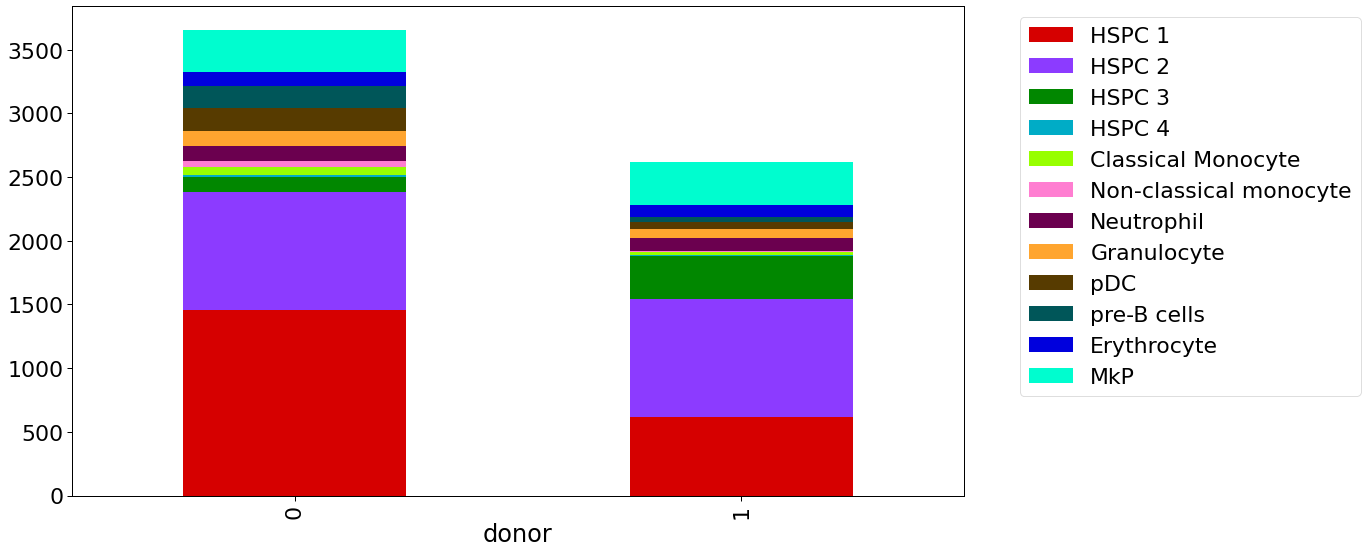

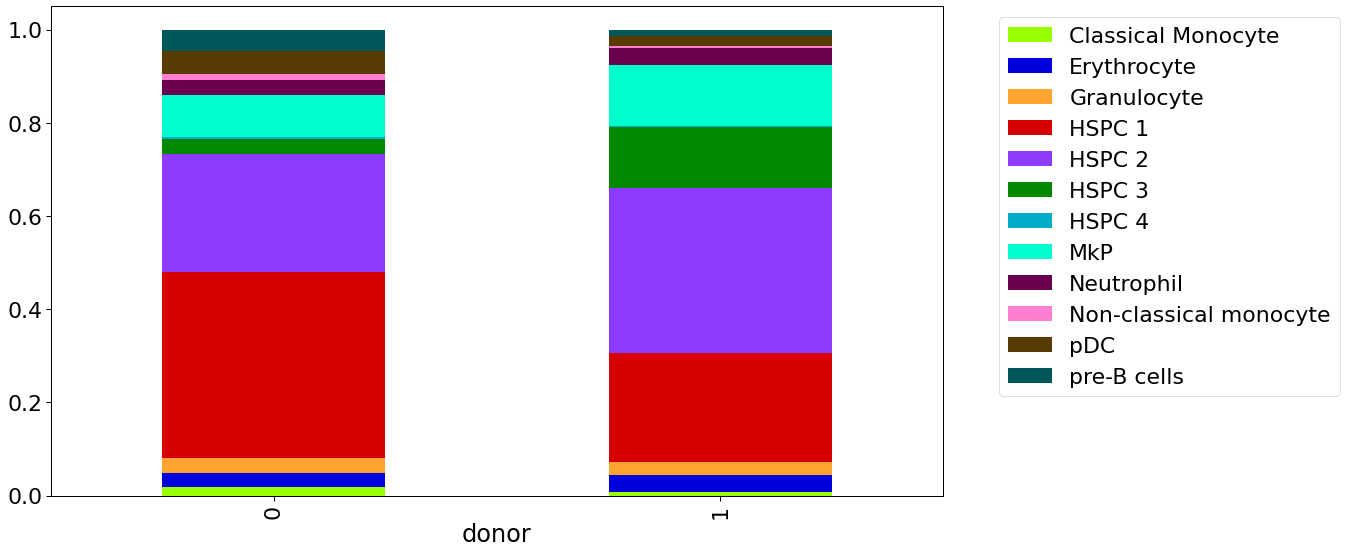

In [14]:
f, ax = plt.subplots(figsize=(16,9))

donor_counts = tmp.loc[:, [x for x in hue_order if x in tmp.columns]]
donor_proportion = tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose()
donor_proportion.to_csv(join(outdir, f"donor{don}.clust_proportion.csv"))
donor_counts.to_csv(join(outdir, f"donor{don}.clust_counts.csv"))


donor_counts.plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "all_clones_barplot_clones.pdf"))

### Normalize to each donor
f, ax = plt.subplots(figsize=(16,9))
donor_proportion.plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.pdf"))



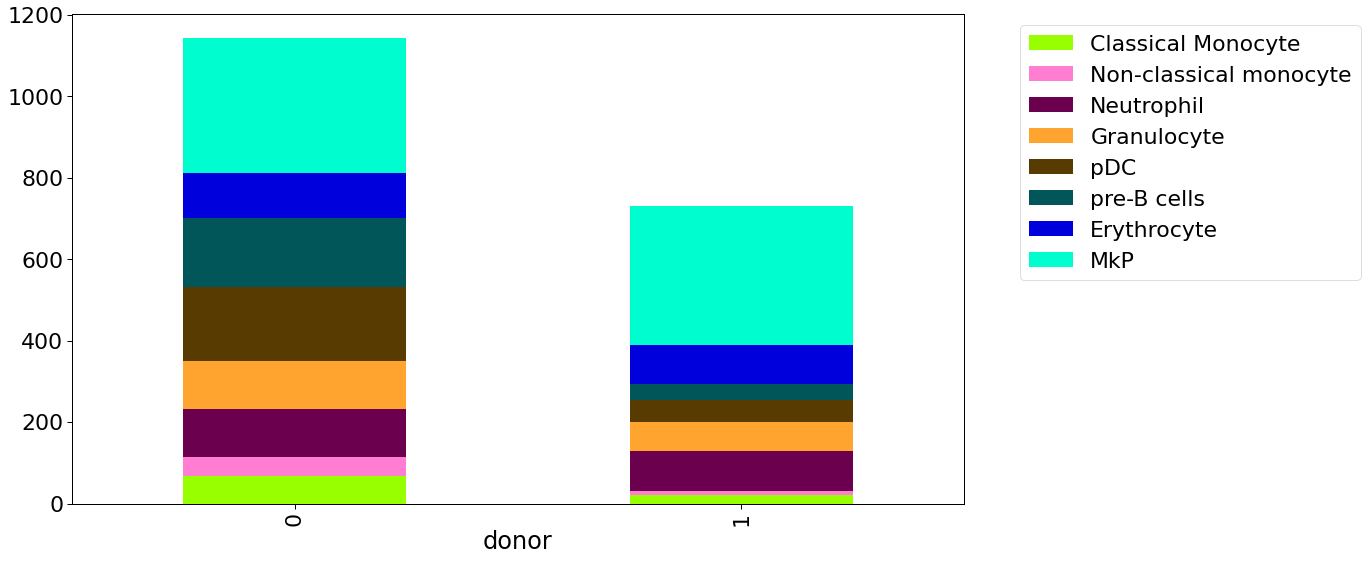

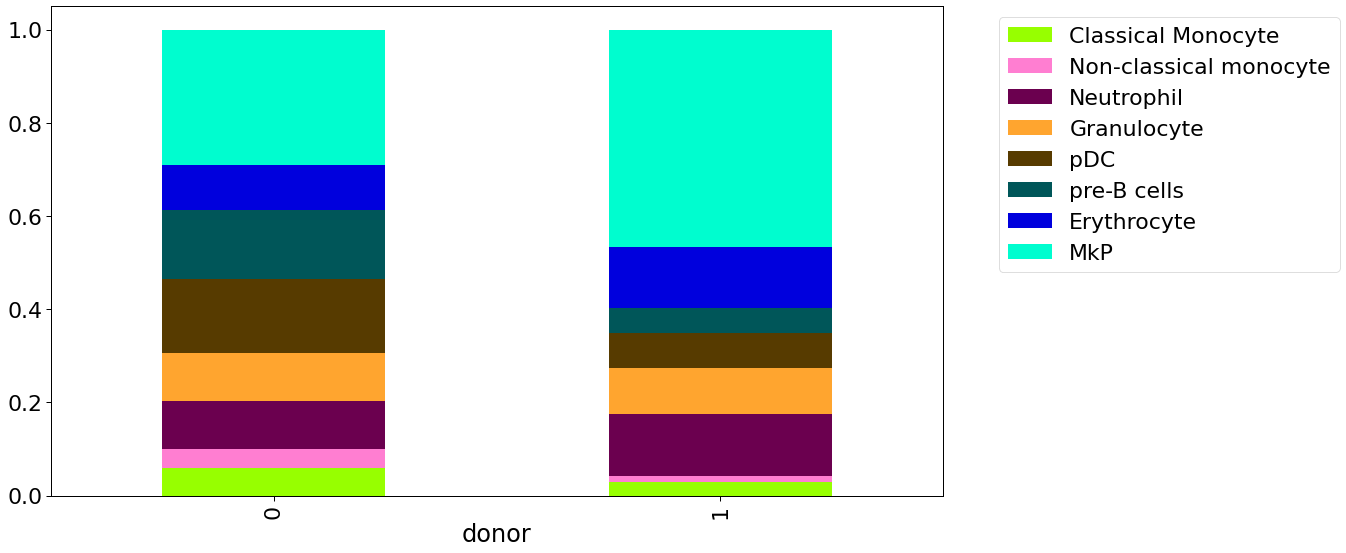

In [218]:
## Without HSPC
f, ax = plt.subplots(figsize=(16,9))

tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).fillna(0)
tmp = tmp.loc[:, [x for x in hue_order if x in tmp.columns and hspc_prefix not in x]]

donor_counts = tmp
donor_proportion = tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose()

donor_counts.plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "noHSPC.all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "noHSPC.all_clones_barplot_clones.pdf"))

### Normalize to each donor
f, ax = plt.subplots(figsize=(16,9))
donor_proportion.plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "noHSPC.norm_all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "noHSPC.norm_all_clones_barplot_clones.pdf"))




curr_order ['HSPC 1', 'HSPC 2', 'HSPC 3', 'HSPC 4', 'Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


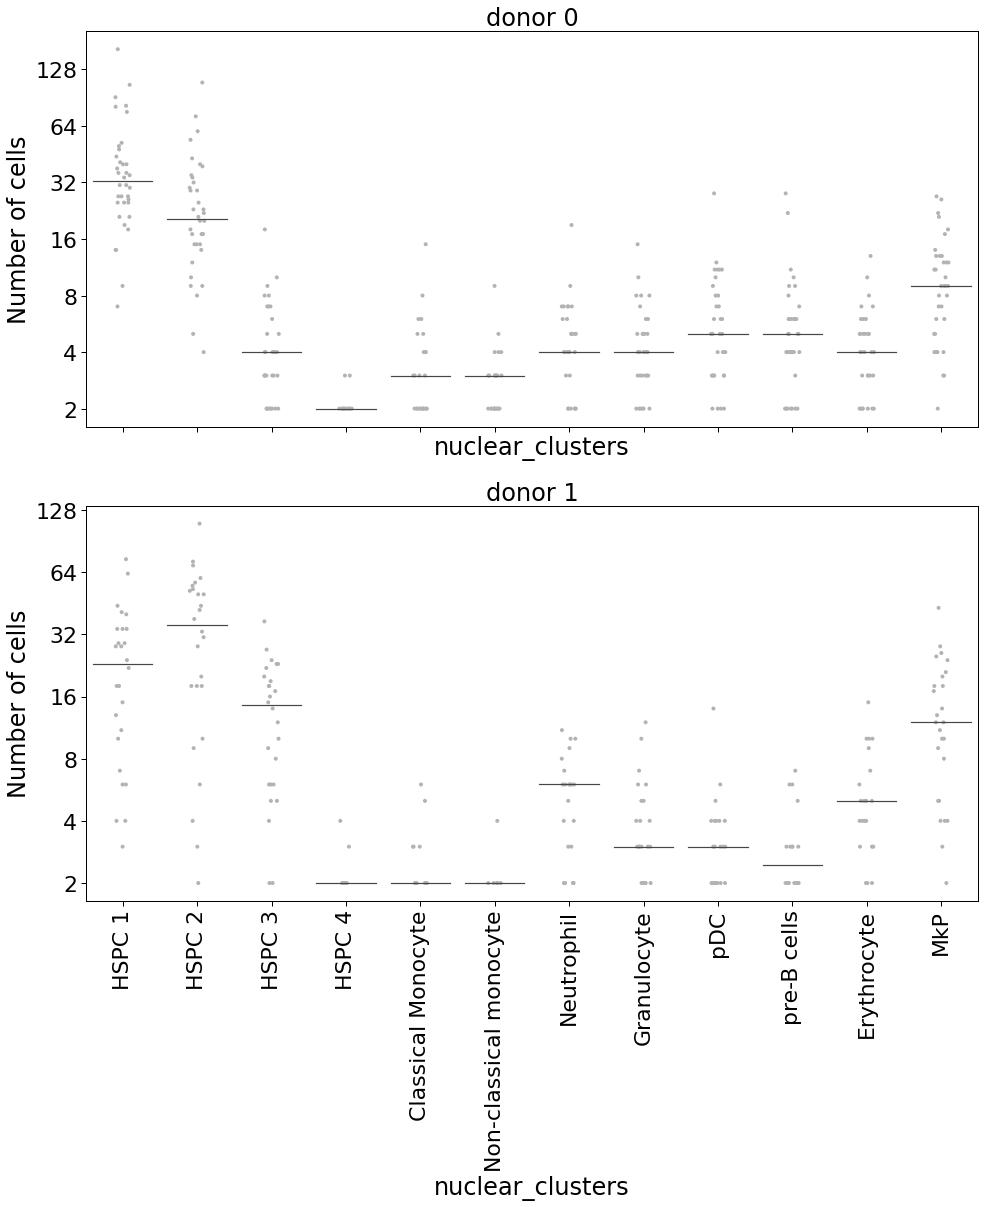

In [215]:
strpplots(clone_counts,"log2_clone_cluster_scatter_diffY", y_col="log2")

curr_order ['Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']


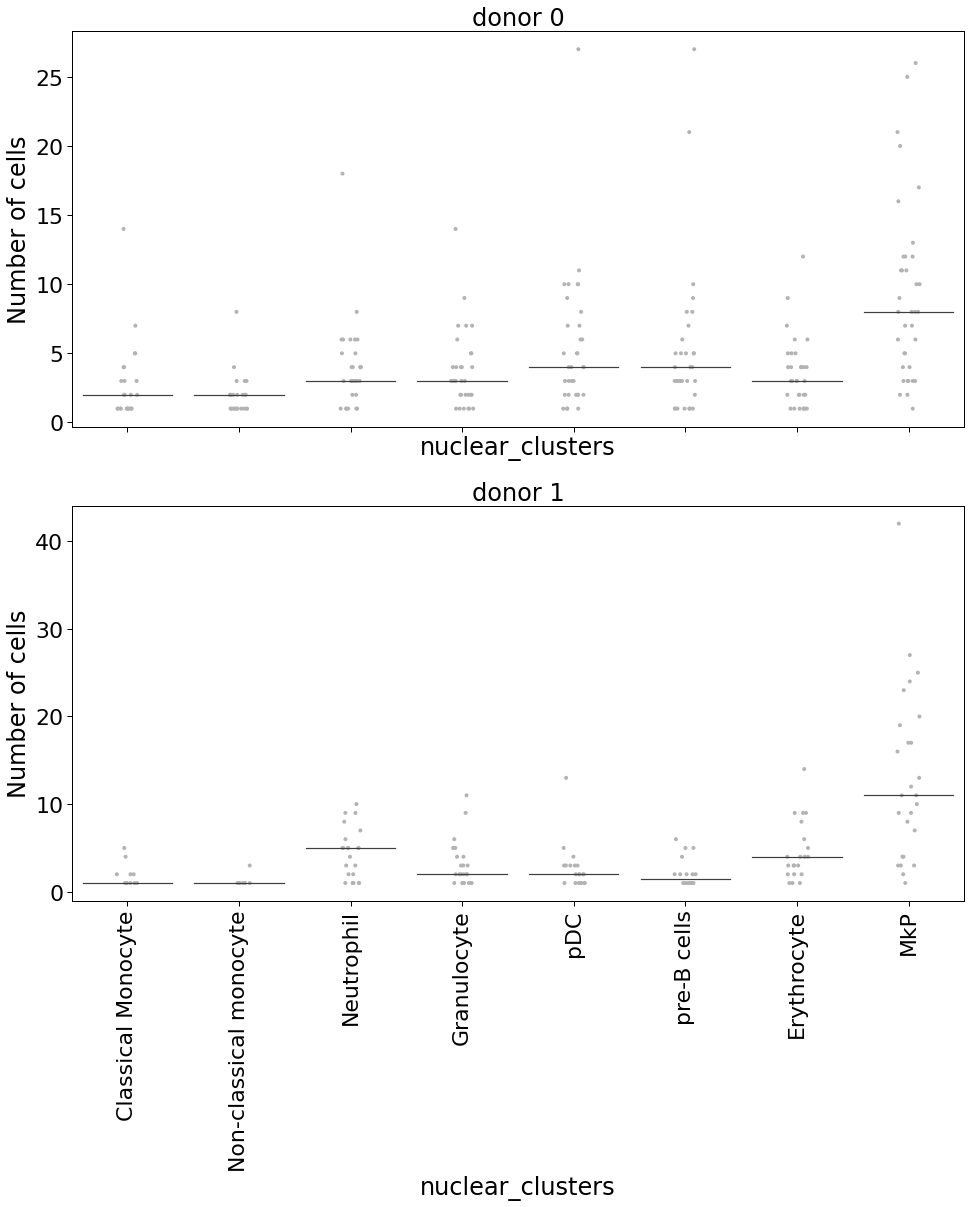

In [216]:
strpplots(clone_counts.loc[~(clone_counts["nuclear_clusters"].str.contains("HSPC"))],
          "NoHSPC_log2_clone_cluster_scatter_diffY", y_col="ncells")


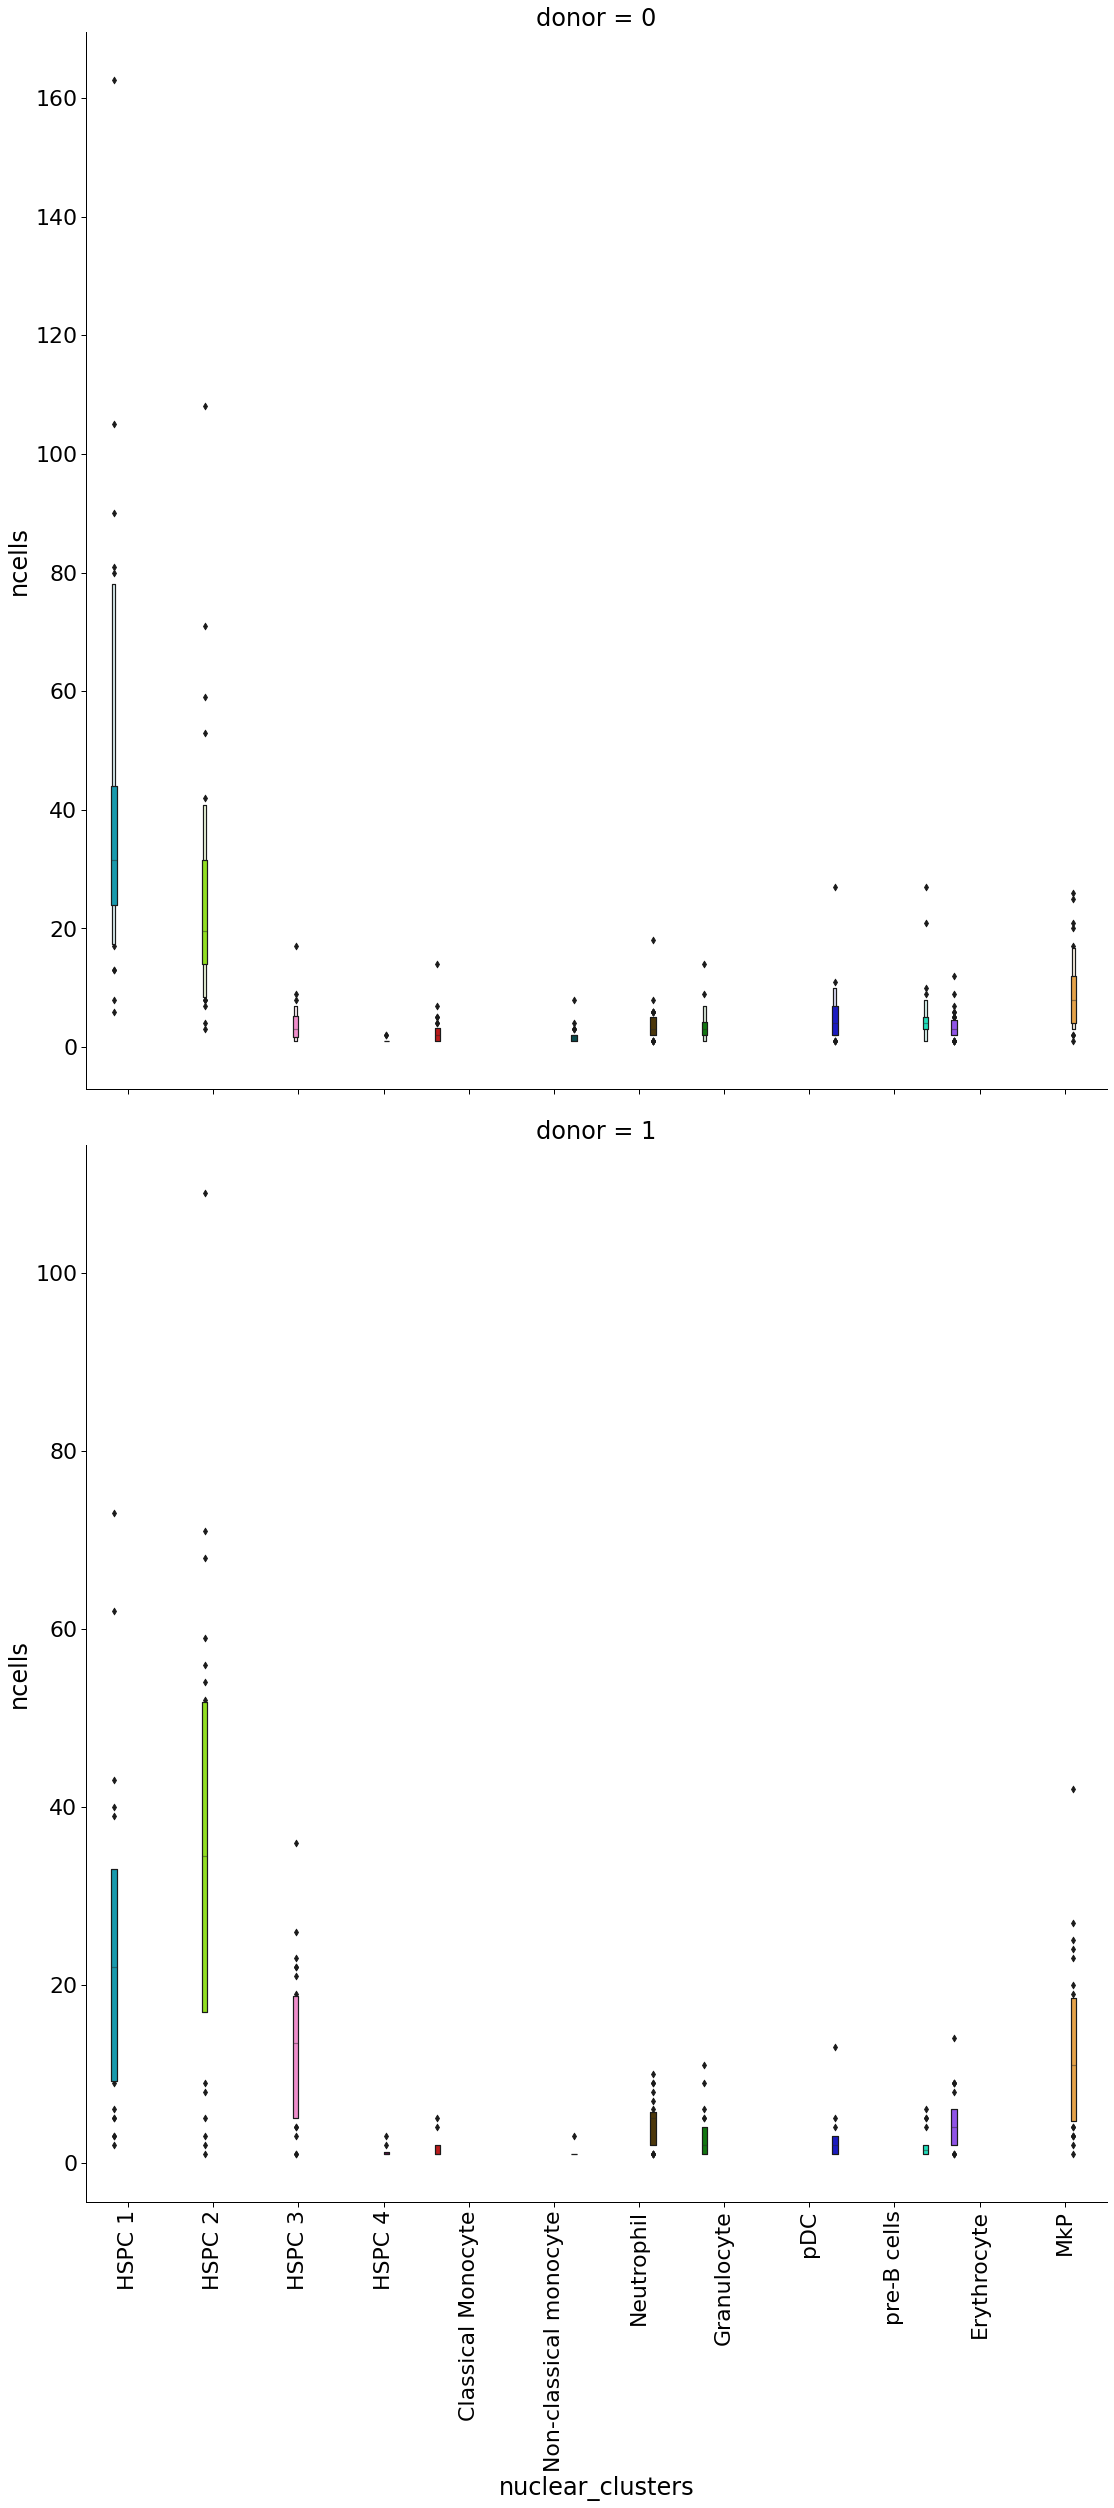

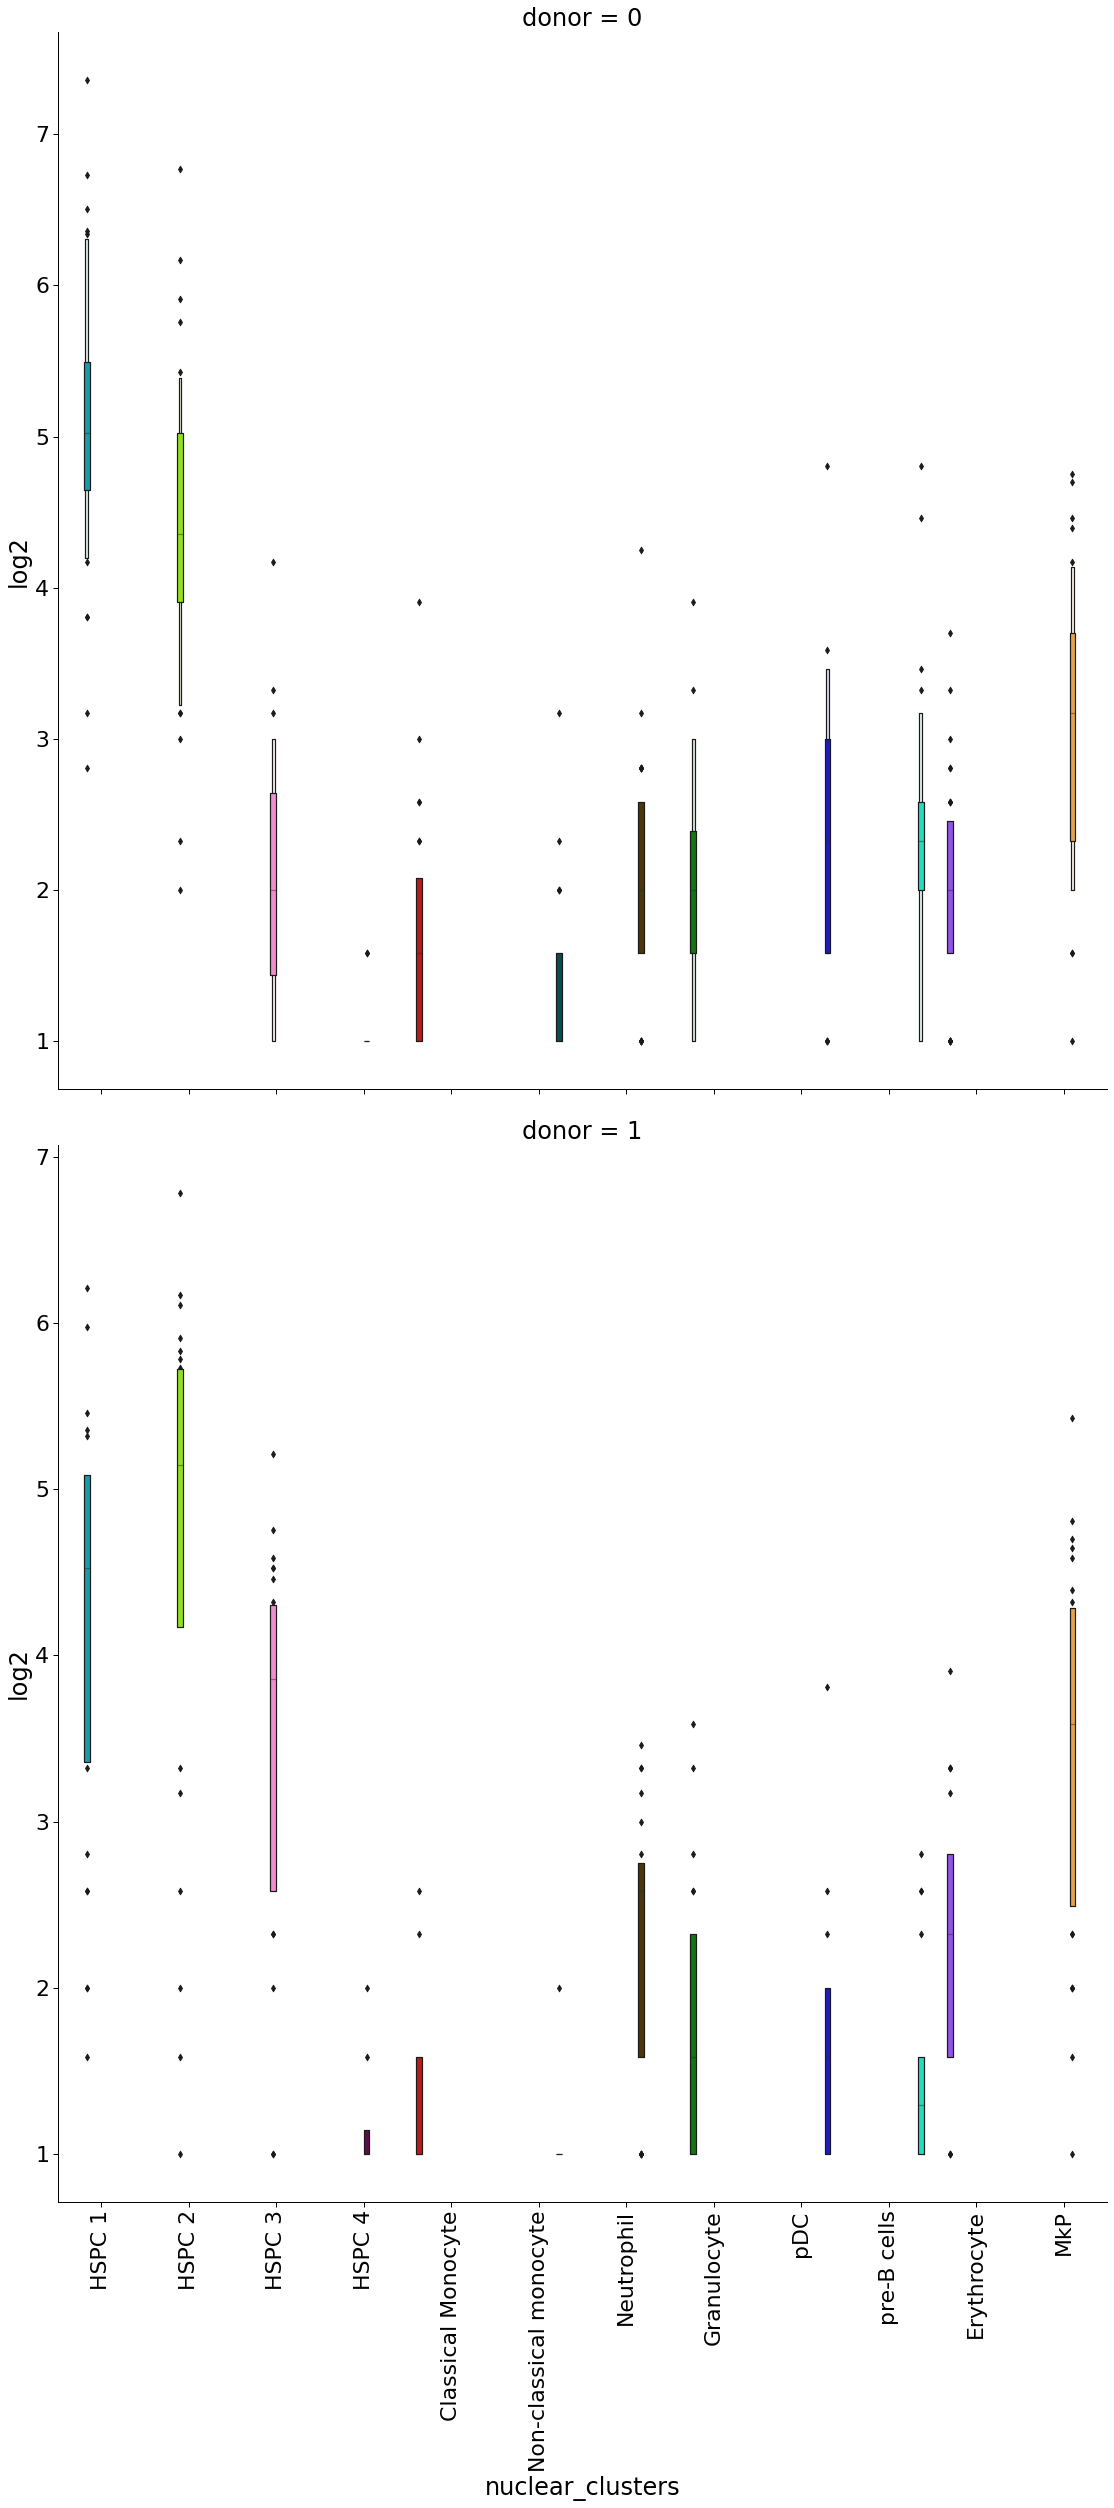

In [17]:

sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, sharey=False,
            row="donor", kind="boxen", height=16, hue="nuclear_clusters",
            palette=palette, order=hue_order)
# sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, sharey=False,
#             row="donor", kind="boxen", height=16, hue="nuclear_clusters", outlier_prop=0.001, showfliers=False,
#             palette=palette, hue_order=hue_order, dodge=True)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_boxen_diffY.svg"))
plt.savefig(join(outdir, "clone_cluster_boxen_diffY.pdf"))


clone_counts["log2"] = np.log2(1+clone_counts["ncells"]).fillna(0)
sns.catplot(x="nuclear_clusters", y="log2", data=clone_counts, sharey=False,
            row="donor", kind="boxen", height=16, hue="nuclear_clusters",
            palette=palette, order=hue_order)

plt.xticks(rotation=90)
plt.savefig(join(outdir, "log2_clone_cluster_boxen_diffY.svg"))
plt.savefig(join(outdir, "log2_clone_cluster_boxen_diffY.pdf"))




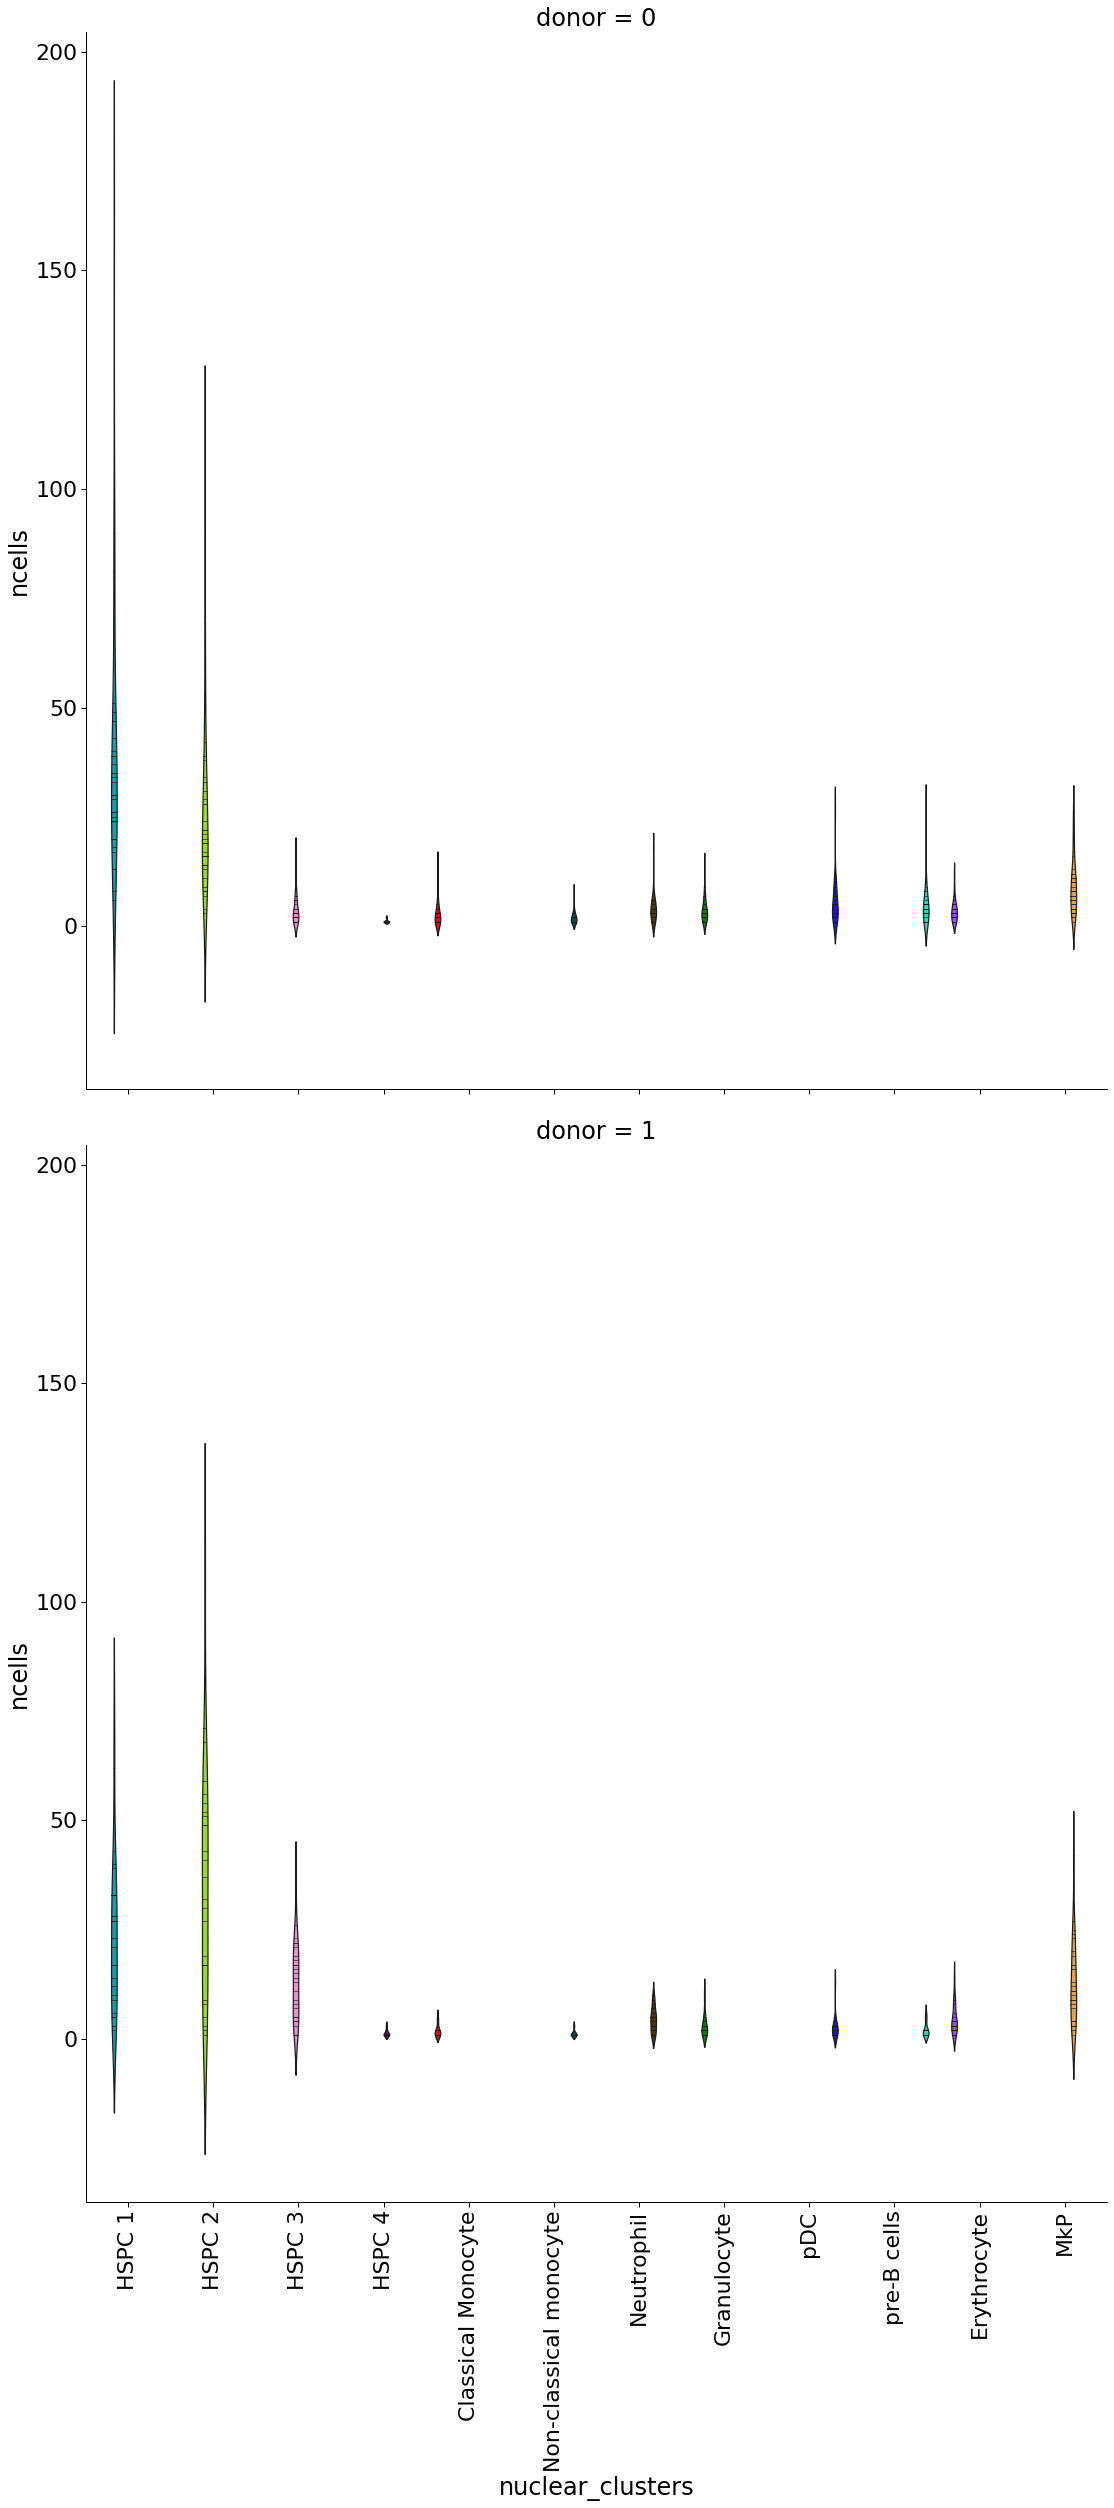

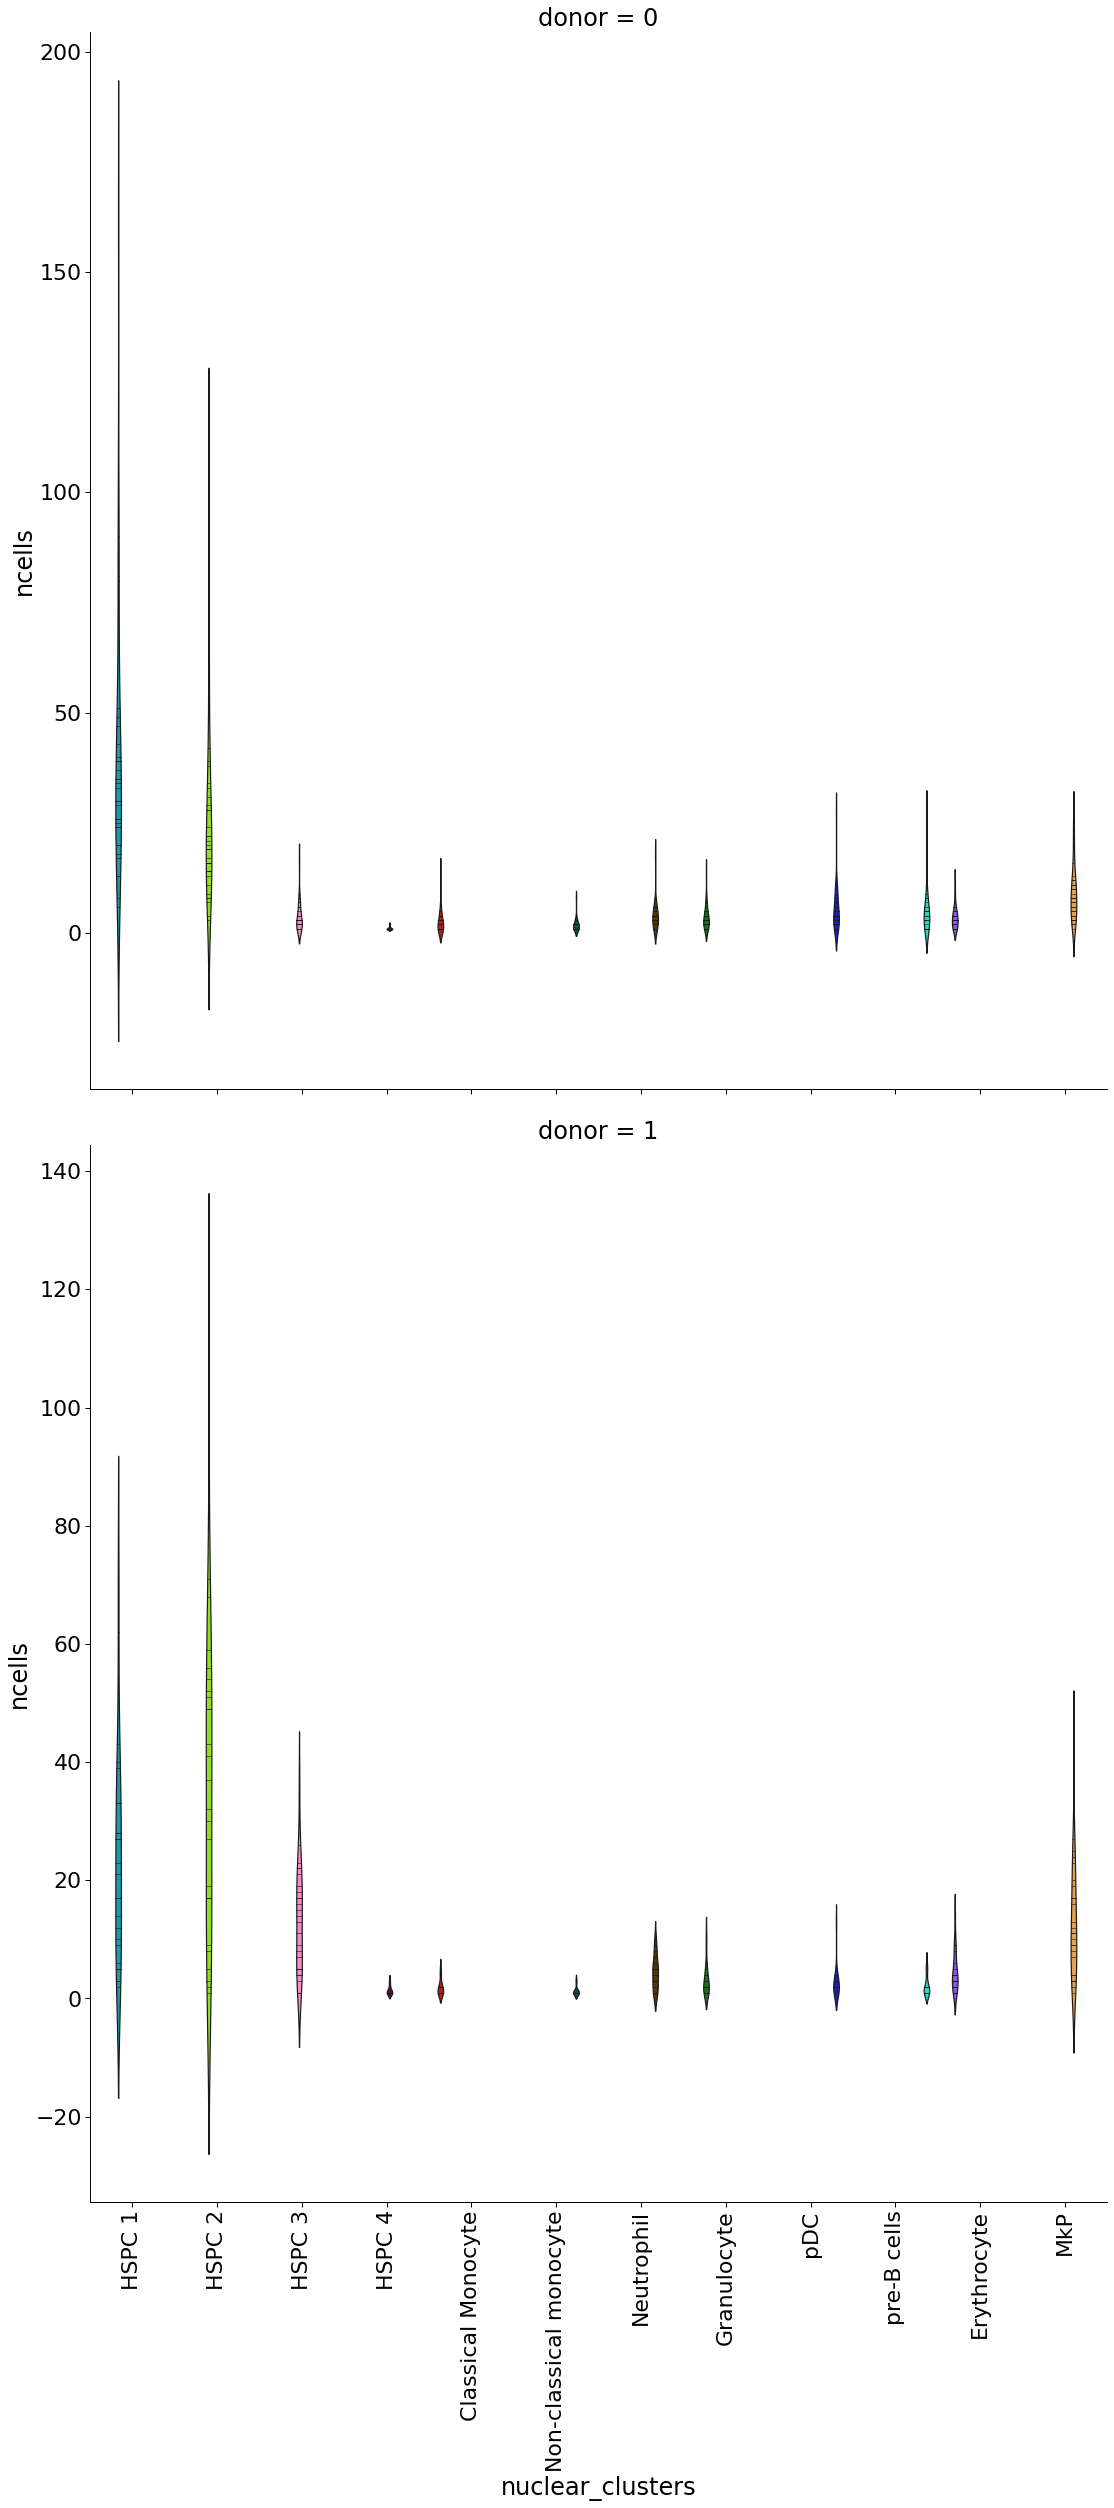

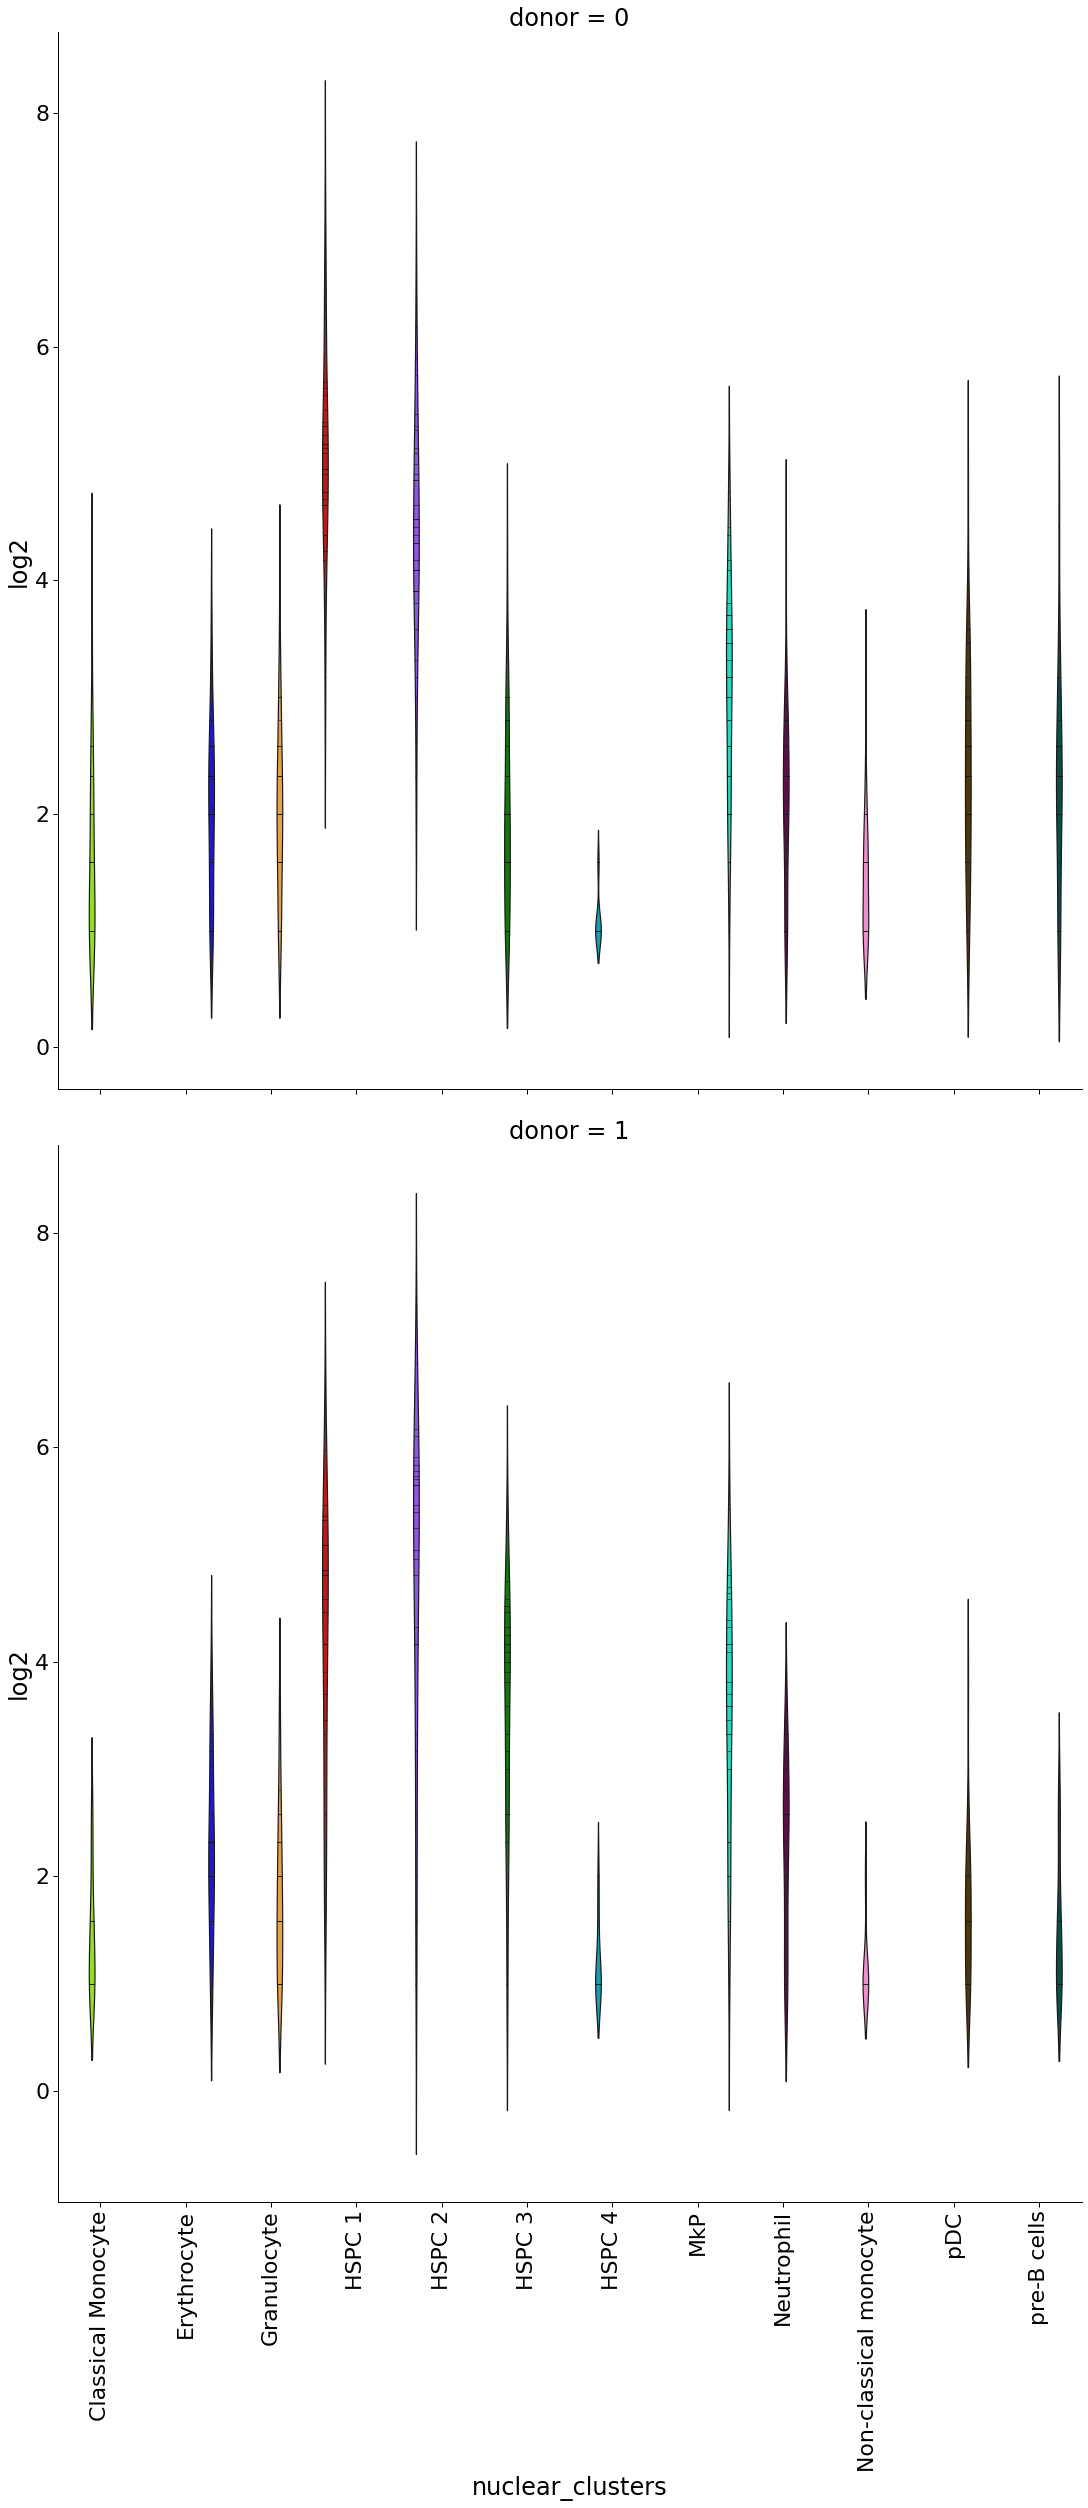

In [18]:

sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, inner='stick',
            hue="nuclear_clusters", palette=palette, order=hue_order,
            row="donor", kind="violin", height=16)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_box.svg"))
plt.savefig(join(outdir, "clone_cluster_box.pdf"))


sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, inner='stick', sharey=False,
            row="donor", kind="violin", height=16, hue="nuclear_clusters",
            palette=palette, order=hue_order,)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_box_diffY.svg"))
plt.savefig(join(outdir, "clone_cluster_box_diffY.pdf"))




sns.catplot(x="nuclear_clusters", y="log2", data=clone_counts, inner='stick', sharey=False,
            row="donor", kind="violin", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order,)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "log2_clone_cluster_box_diffY.svg"))
plt.savefig(join(outdir, "log2_clone_cluster_box_diffY.pdf"))


## Plot counts for each donor

In [15]:

clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")


clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]



In [ ]:
clone_counts_filt_10_df.head()

In [ ]:
%matplotlib inline
donor_clone_barplots(clone_counts_filt_10_df,
      name="clone_cluster_counts")

# Normalize per clone

In [ ]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

In [ ]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


In [ ]:
donor_clone_barplots(clone_norm_df,
      name="normalized_counts")

## Normalize per condition first, then sum in each clone, then re-normalize

In [ ]:

group_counts = se_cells_meta.groupby(["donor", "condition"]).size() #.reset_index().rename({0:"ncells"}, axis=1)
clone_cond_counts = se_cells_meta.groupby(["name", "donor", "condition", "nuclear_clusters"]).size().reset_index().rename({0:"ncells"}, axis=1) 


#clone_cond_sums = clone_cond_counts.groupby(["name", "condition"]).sum()["ncells"]


clone_cond_counts["norm"] = clone_cond_counts.apply(lambda x: x["ncells"]/ group_counts.loc[(x["donor"], x["condition"])],
                                                    axis=1)
clone_cond_counts

clone_cond_counts_norm = clone_cond_counts.groupby(["name", "donor", "nuclear_clusters"]).sum()["norm"].reset_index()
clone_cond_counts_norm

clone_cond_sums = clone_cond_counts_norm.groupby(["name"]).sum()["norm"]
clone_cond_sums



clone_cond_counts_norm["norm_total"] = clone_cond_counts_norm.apply(lambda x: x["norm"]/clone_cond_sums.loc[x["name"]],
                                                                   axis=1)
clone_cond_counts_norm


clone_cond_df = clone_cond_counts_norm.pivot(index=["name", "donor"], columns="nuclear_clusters", values="norm_total")
clone_cond_df.columns.name = ""
clone_cond_df["ncells"] = clone_cond_df.sum()
clone_cond_df = clone_cond_df.reset_index(level=1)

#clone_cond_df


%matplotlib inline
donor_clone_barplots(clone_cond_df,
      name="normCondition_clone_cluster_counts")

## Only top clones

In [ ]:
# cell_25 = clone_counts_filt_10_df.index #keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

# donor_clone_barplots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=min_cell),
#       name=f"top20_minCell{min_cell}_clone_cluster_counts")

# donor_clone_barplots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
#      name=f"top20_minCell{min_cell}_clone_normalized_counts")

---

## Group counts across donors and conditions and just conditions

In [ ]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition", "donor"]).size()
group_counts
f, ax = plt.subplots()
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor"], values=0).plot.bar(stacked=True,
                                                                                                              color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "all_conditions_clones_barplot_clones.pdf"))



### Normalize to each condition and donor
f, ax = plt.subplots()
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition","donor"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "norm_all_conditions_clones_barplot_clones.pdf"))


In [ ]:
## Group counts across donors and conditions and just conditions
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition"]).size()
group_counts
f, ax = plt.subplots()
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition"], values=0).plot.bar(stacked=True, 
                                                                                                     color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "conditions_barplot_clones.png"), bbox_inches='tight')
plt.savefig(join(outdir, "conditions_clones_barplot_clones.pdf"), bbox_inches='tight')


f, ax = plt.subplots()
### Normalize to each condition and donor
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True,color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_conditions_clones_barplot_clones.png"), bbox_inches='tight')
plt.savefig(join(outdir, "norm_conditions_clones_barplot_clones.pdf"), bbox_inches='tight')



---

---

---

In [ ]:
outdir